In [2]:
# --- Basic libraries ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Statistical tests ---
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# --- Settings ---
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10,5)

In [3]:
# Load dataset
df = pd.read_csv("Data/final_clean_data.csv")

# Quick overview
display(df.head())
df.info()
df.describe().T

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,...,DEP_DELAY_GROUP,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed
0,4,1,2,AA,GEG,WA,PHX,AZ,6.53,-5.0,...,-1.0,9.33,168.0,1020.0,5,33.0,36.0,89.0,5.0,10.0
1,4,1,2,AA,GEG,WA,PHX,AZ,15.45,15.0,...,1.0,18.12,160.0,1020.0,5,33.0,45.0,63.0,10.0,10.0
2,4,1,2,AA,SEA,WA,CLT,NC,7.33,-3.0,...,-1.0,15.32,299.0,2279.0,10,37.0,43.0,80.0,10.0,6.0
3,4,1,2,AA,SEA,WA,CLT,NC,13.83,-3.0,...,-1.0,21.83,300.0,2279.0,10,41.0,49.0,74.0,10.0,6.0
4,4,1,2,AA,SEA,WA,CLT,NC,22.00,-6.0,...,-1.0,6.00,300.0,2279.0,10,41.0,45.0,86.0,10.0,7.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45155 entries, 0 to 45154
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MONTH                      45155 non-null  int64  
 1   DAY_OF_MONTH               45155 non-null  int64  
 2   DAY_OF_WEEK                45155 non-null  int64  
 3   OP_UNIQUE_CARRIER          45155 non-null  object 
 4   ORIGIN                     45155 non-null  object 
 5   ORIGIN_STATE_ABR           45155 non-null  object 
 6   DEST                       45155 non-null  object 
 7   DEST_STATE_ABR             45155 non-null  object 
 8   CRS_DEP_TIME               45155 non-null  float64
 9   DEP_DELAY                  45155 non-null  float64
 10  DEP_DELAY_NEW              45155 non-null  float64
 11  DEP_DEL15                  45155 non-null  float64
 12  DEP_DELAY_GROUP            45155 non-null  float64
 13  CRS_ARR_TIME               45155 non-null  flo

,count,mean,std,min,25%,50%,75%,max
MONTH,45155.0,5.046728,0.808438,4.00,4.00,5.00,6.00,6.00
DAY_OF_MONTH,45155.0,15.877489,8.780866,1.00,8.00,16.00,23.00,31.00
DAY_OF_WEEK,45155.0,3.971321,2.005020,1.00,2.00,4.00,6.00,7.00
CRS_DEP_TIME,45155.0,13.585353,5.287004,0.08,9.08,12.97,17.90,23.98
DEP_DELAY,45155.0,0.125833,10.457920,-27.00,-7.00,-3.00,4.00,35.00
DEP_DELAY_NEW,45155.0,3.996368,7.926741,0.00,0.00,0.00,4.00,35.00
DEP_DEL15,45155.0,0.117418,0.321921,0.00,0.00,0.00,0.00,1.00
DEP_DELAY_GROUP,45155.0,-0.504241,0.764952,-2.00,-1.00,-1.00,0.00,2.00
CRS_ARR_TIME,45155.0,15.123422,5.585735,0.02,11.08,15.68,19.22,23.98
CRS_ELAPSED_TIME,45155.0,183.310597,84.569100,49.00,125.00,166.00,244.00,411.00


In [4]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing


Series([], dtype: int64)

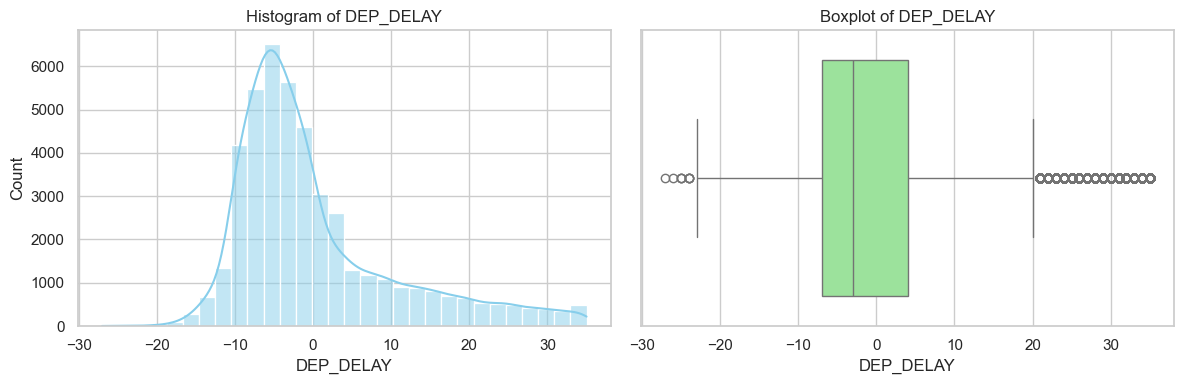

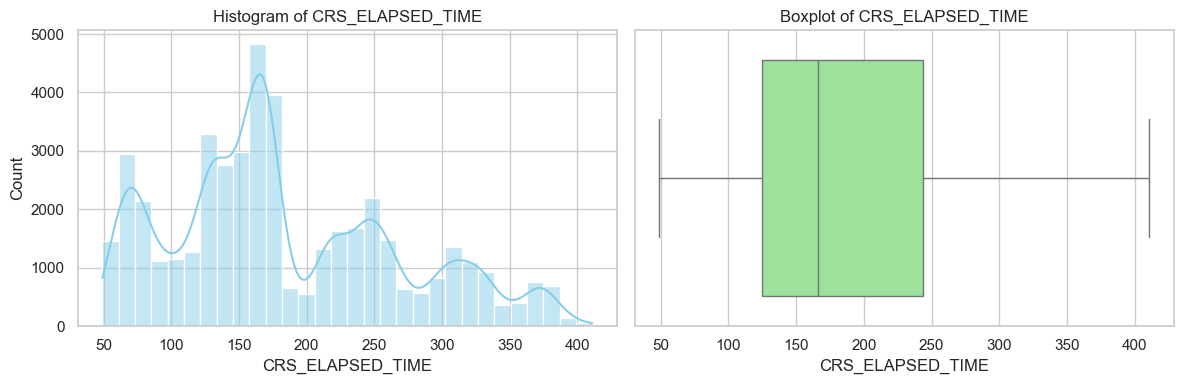

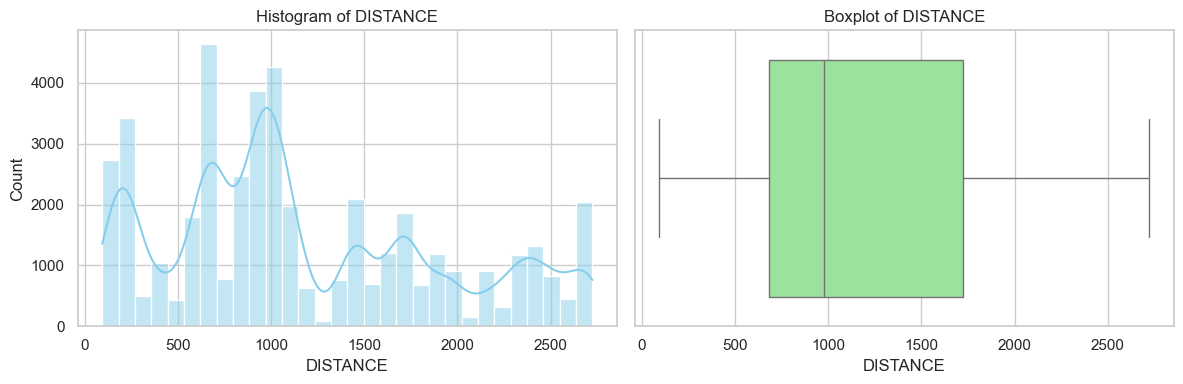

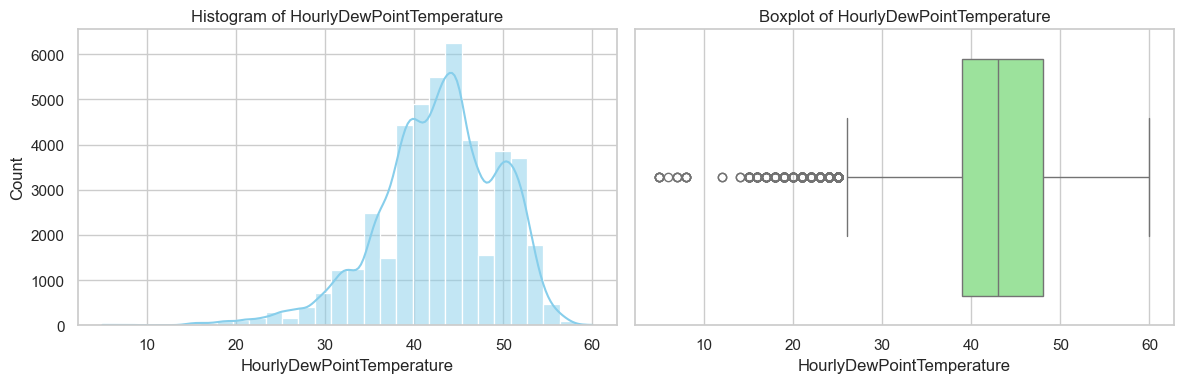

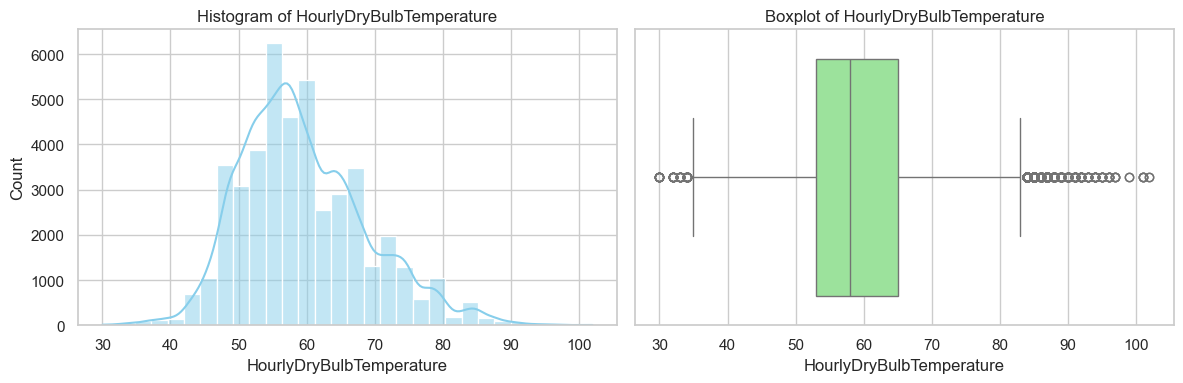

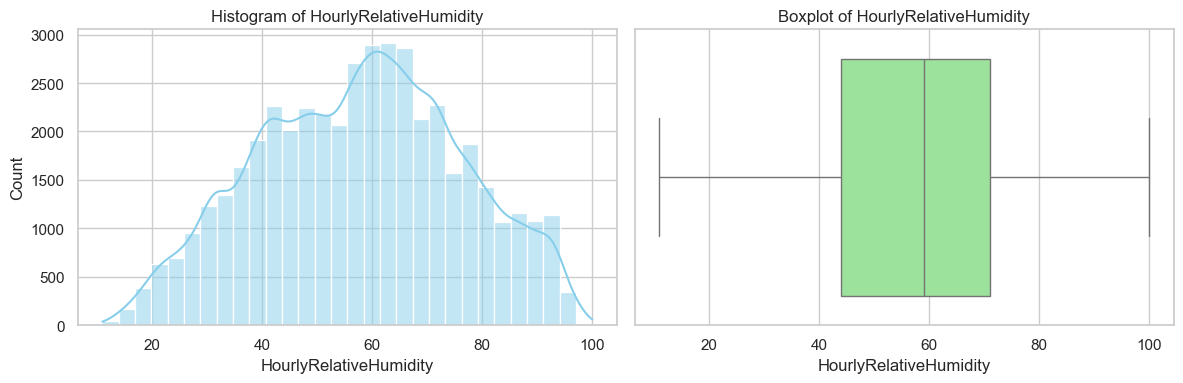

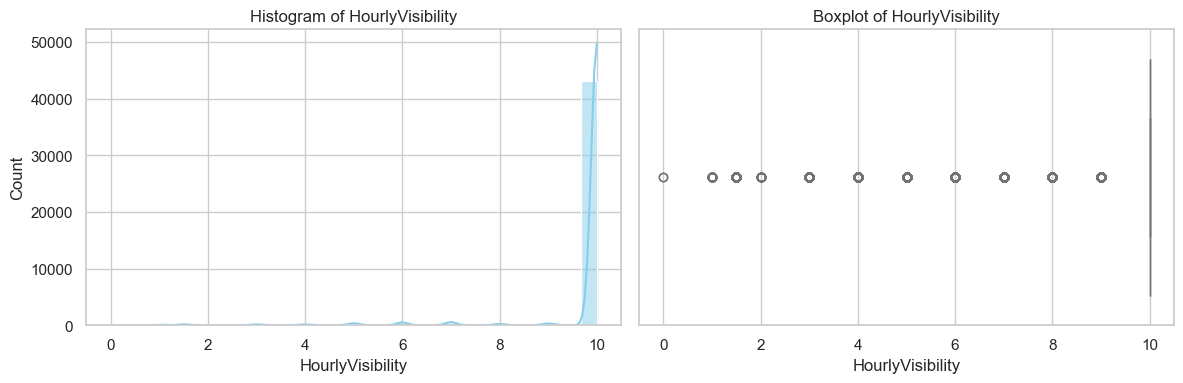

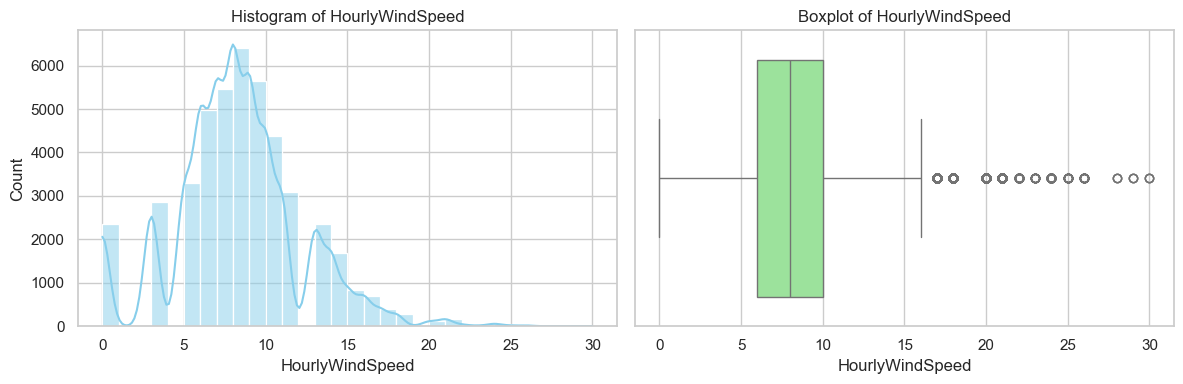

In [5]:
numeric_features = [
    "DEP_DELAY", "CRS_ELAPSED_TIME", "DISTANCE",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed"
]

for col in numeric_features:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), bins=30, kde=True, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna(), color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_34240\1365997467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_delay.index, y=carrier_delay.values, palette="viridis")


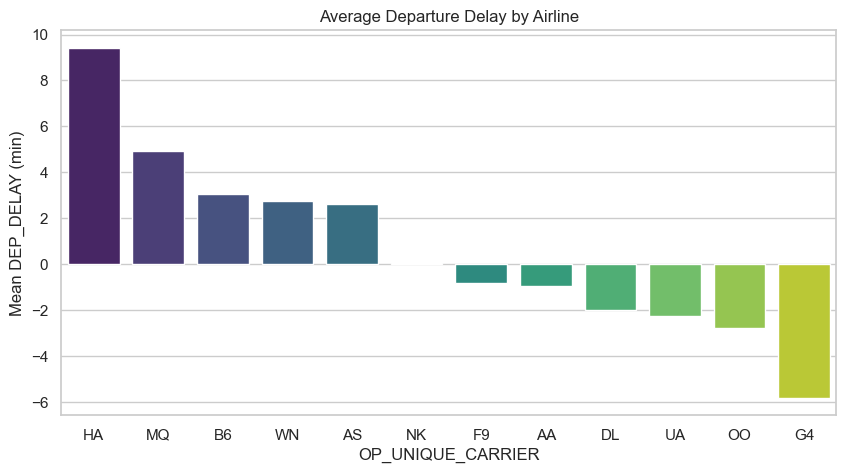

C:\Users\PC\AppData\Local\Temp\ipykernel_34240\1365997467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MONTH', y='DEP_DELAY', data=df, palette="mako")


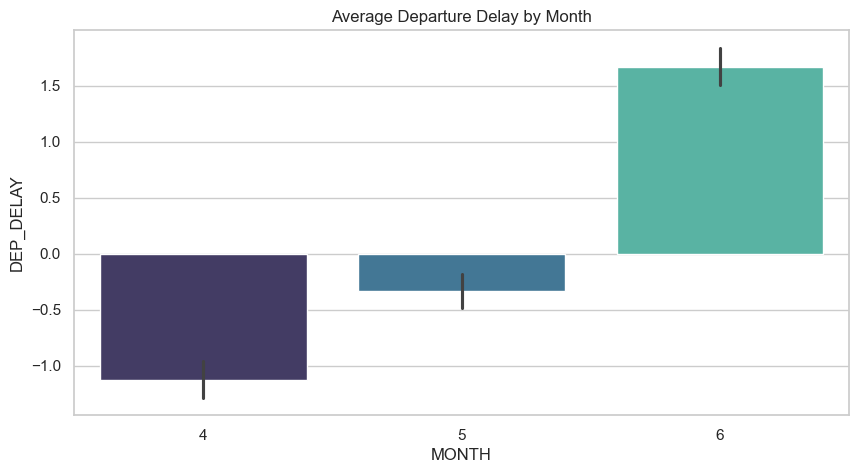

C:\Users\PC\AppData\Local\Temp\ipykernel_34240\1365997467.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=df, palette="crest")


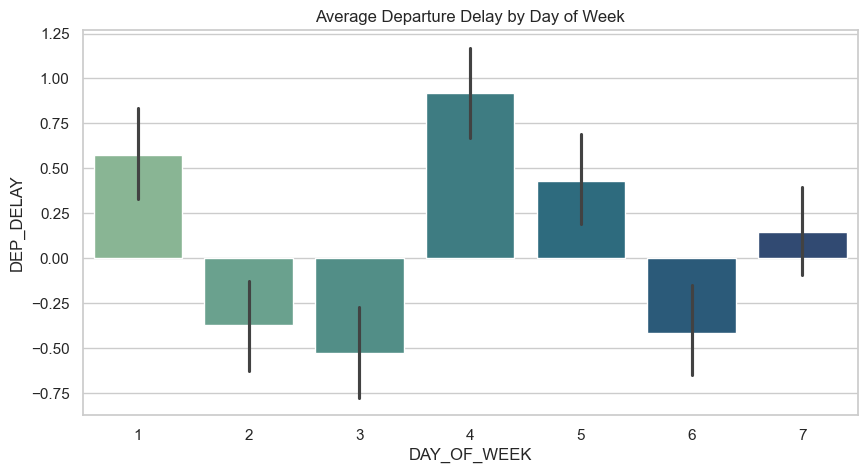

In [6]:
# Average delay by airline
carrier_delay = df.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].mean().sort_values(ascending=False)
sns.barplot(x=carrier_delay.index, y=carrier_delay.values, palette="viridis")
plt.title("Average Departure Delay by Airline")
plt.ylabel("Mean DEP_DELAY (min)")
plt.show()

# Average delay by month
sns.barplot(x='MONTH', y='DEP_DELAY', data=df, palette="mako")
plt.title("Average Departure Delay by Month")
plt.show()

# Average delay by day of week
sns.barplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=df, palette="crest")
plt.title("Average Departure Delay by Day of Week")
plt.show()


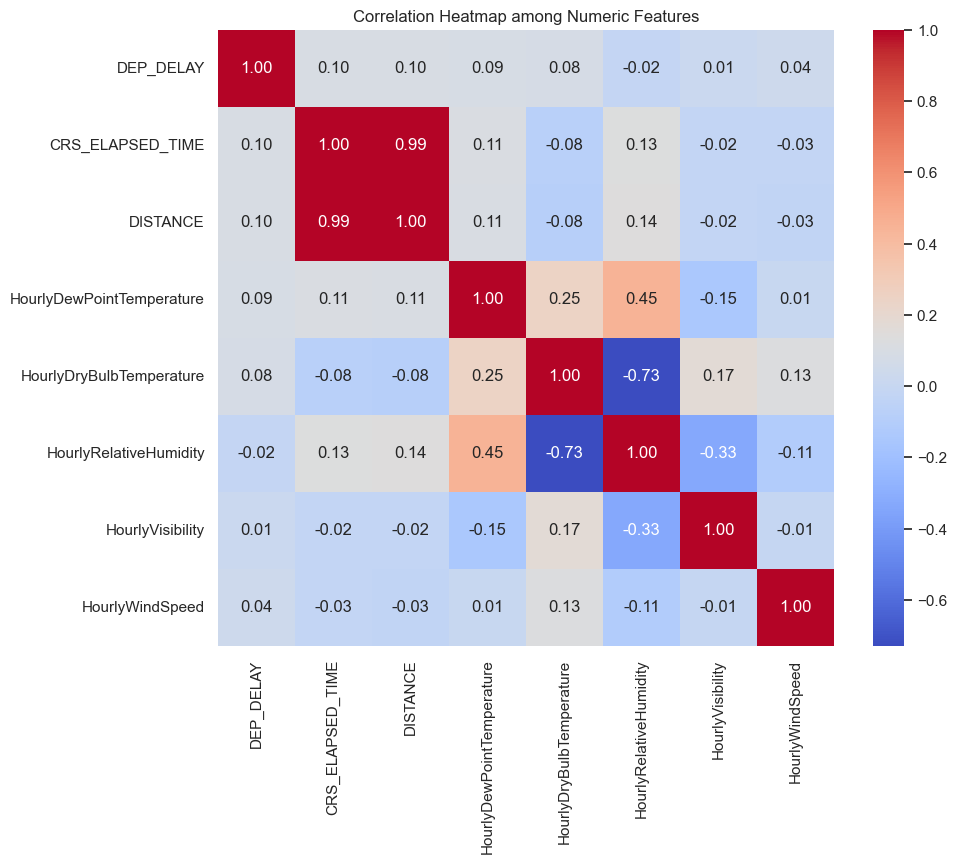

In [7]:
corr_features = [
    "DEP_DELAY", "CRS_ELAPSED_TIME", "DISTANCE",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed"
]

corr_matrix = df[corr_features].corr(method="pearson")

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap among Numeric Features")
plt.show()


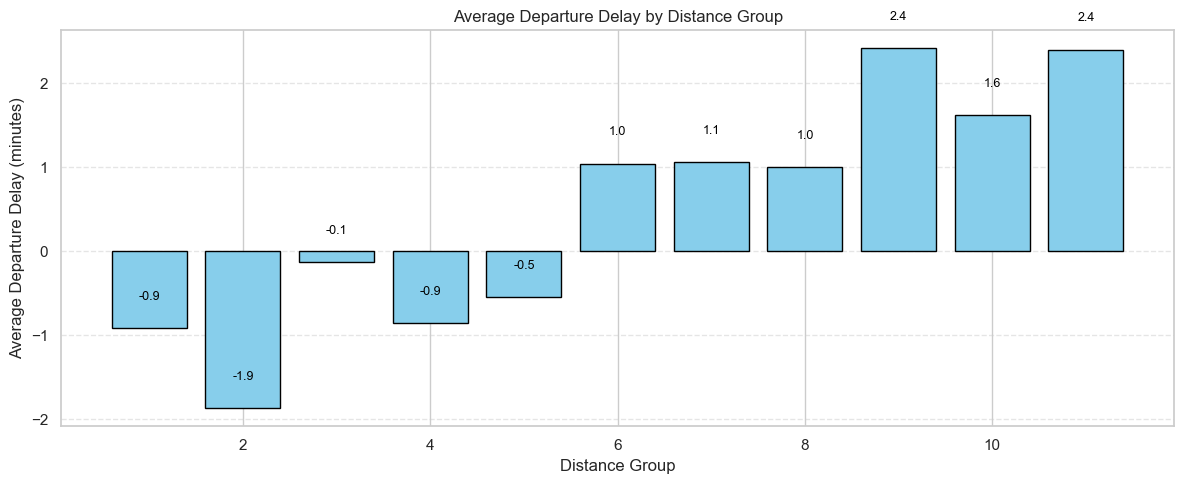

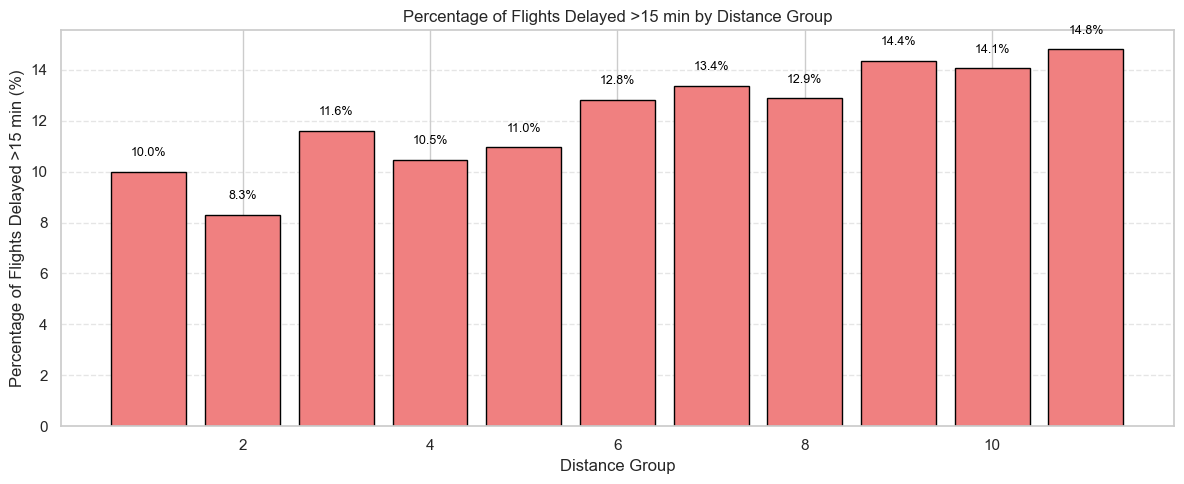

In [8]:
# Average departure delay and % of flights delayed >15 min by distance group
dist_stats = (
    df.groupby("DISTANCE_GROUP")
      .agg(
          AVG_DEP_DELAY=("DEP_DELAY", "mean"),  # Average delay (minutes)
          PCT_DELAYED_15=("DEP_DEL15", "mean"), # % flights delayed >15min
          NUM_FLIGHTS=("DEP_DELAY", "count")
      )
      .reset_index()
)

# --- Average Delay by Distance Group ---
plt.figure(figsize=(12,5))
bars = plt.bar(dist_stats["DISTANCE_GROUP"],
               dist_stats["AVG_DEP_DELAY"],
               color="skyblue", edgecolor="black")

for bar, val in zip(bars, dist_stats["AVG_DEP_DELAY"]):
    plt.text(bar.get_x() + bar.get_width()/2,
             val + 0.3,
             f"{val:.1f}",
             ha='center', va='bottom', fontsize=9, color="black")

plt.xlabel("Distance Group")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Distance Group")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- % of Flights Delayed >15 min by Distance Group ---
plt.figure(figsize=(12,5))
bars = plt.bar(dist_stats["DISTANCE_GROUP"],
               dist_stats["PCT_DELAYED_15"] * 100,
               color="lightcoral", edgecolor="black")

for bar, val in zip(bars, dist_stats["PCT_DELAYED_15"] * 100):
    plt.text(bar.get_x() + bar.get_width()/2,
             val + 0.5,
             f"{val:.1f}%",
             ha="center", va="bottom", fontsize=9, color="black")

plt.xlabel("Distance Group")
plt.ylabel("Percentage of Flights Delayed >15 min (%)")
plt.title("Percentage of Flights Delayed >15 min by Distance Group")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


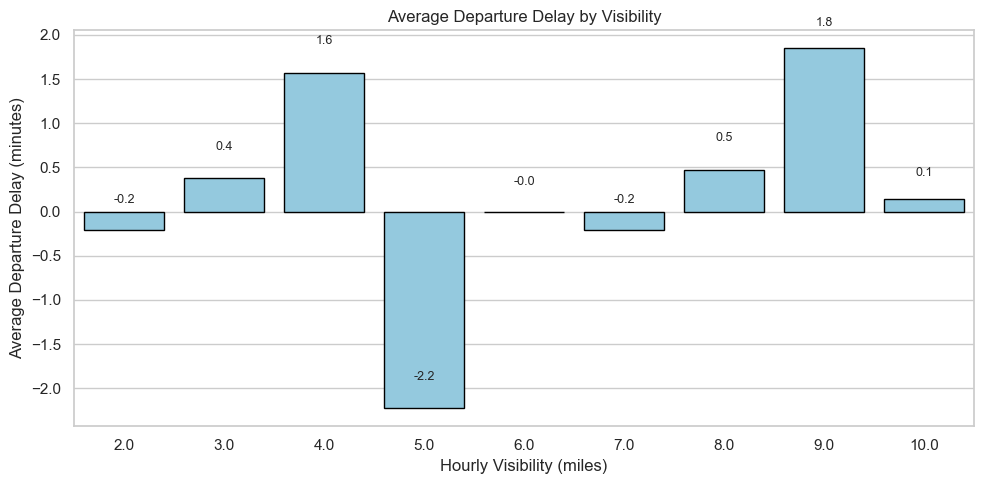

In [14]:
avg_delay_visibility = (
    df[df["HourlyVisibility"] >= 2]
      .groupby("HourlyVisibility")["DEP_DELAY"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(x="HourlyVisibility", y="DEP_DELAY", data=avg_delay_visibility,
            color="skyblue", edgecolor="black")

for i, v in enumerate(avg_delay_visibility["DEP_DELAY"].round(1)):
    plt.text(i, v + 0.3, str(v), ha="center", fontsize=9)

plt.xlabel("Hourly Visibility (miles)")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Visibility")
plt.tight_layout()
plt.show()


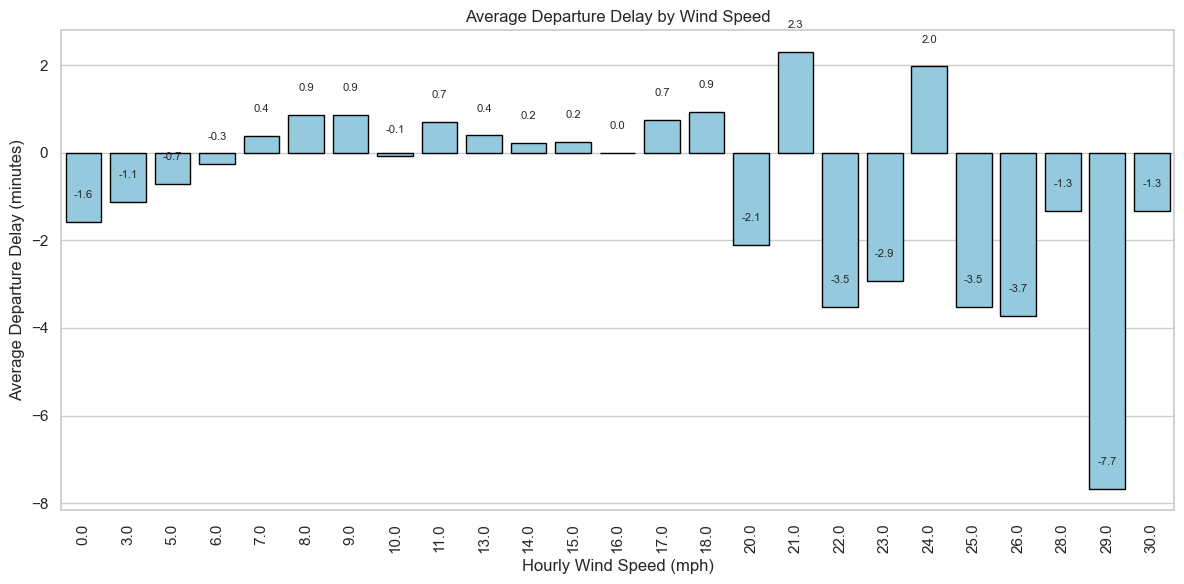

In [15]:
avg_delay_wind = df.groupby("HourlyWindSpeed")["DEP_DELAY"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="HourlyWindSpeed", y="DEP_DELAY", data=avg_delay_wind,
            color="skyblue", edgecolor="black")

for index, row in avg_delay_wind.iterrows():
    plt.text(index, row.DEP_DELAY + 0.5, f"{row.DEP_DELAY:.1f}",
             ha="center", va="bottom", fontsize=8)

plt.xlabel("Hourly Wind Speed (mph)")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Wind Speed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


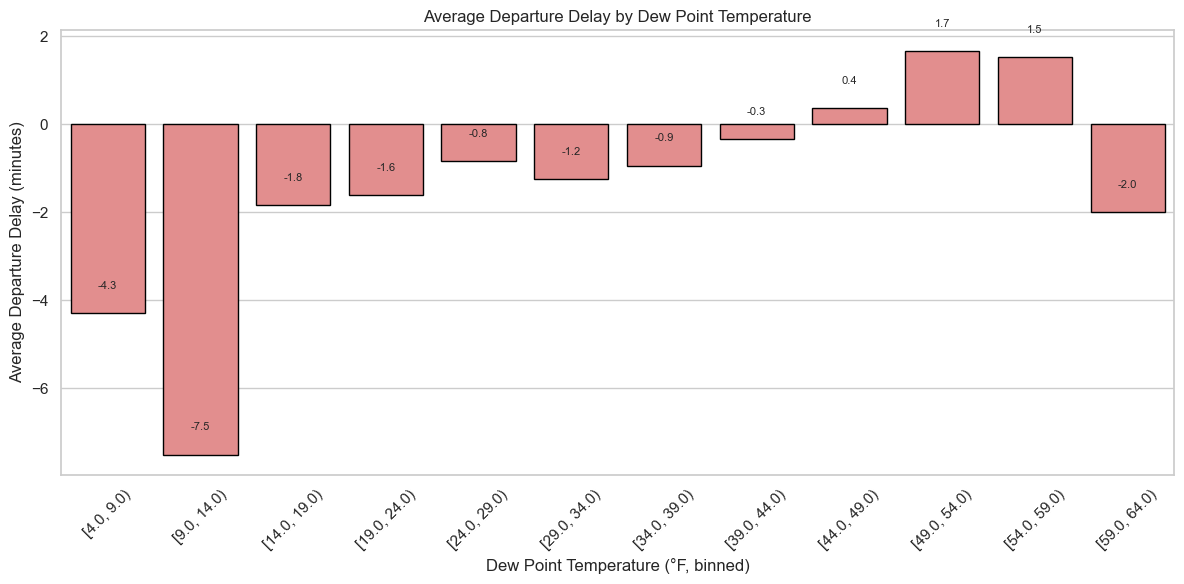

In [16]:
# Create bins every 5°F
bin_edges = np.arange(df["HourlyDewPointTemperature"].min()-1, 
                      df["HourlyDewPointTemperature"].max()+5, 5)

df["TempBin"] = pd.cut(df["HourlyDewPointTemperature"], bins=bin_edges, right=False)

temp_stats = (
    df.groupby("TempBin", observed=True)["DEP_DELAY"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(12,6))
ax = sns.barplot(x="TempBin", y="DEP_DELAY", 
                 data=temp_stats, color="lightcoral", edgecolor="black")

for i, row in temp_stats.iterrows():
    ax.text(i, row.DEP_DELAY + 0.5, f"{row.DEP_DELAY:.1f}", 
            ha="center", va="bottom", fontsize=8)

plt.xlabel("Dew Point Temperature (°F, binned)")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Dew Point Temperature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
groups = [df[df['OP_UNIQUE_CARRIER']==c]['DEP_DELAY'] for c in df['OP_UNIQUE_CARRIER'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 286.74, p-value: 0.0000


In [10]:
if 'DEP_DEL15' in df.columns:
    delay_grp = df[df['DEP_DEL15']==1]['DEP_DELAY']
    ontime_grp = df[df['DEP_DEL15']==0]['DEP_DELAY']

    t_stat, p_val = stats.ttest_ind(delay_grp, ontime_grp, equal_var=False)
    print(f"T-test statistic: {t_stat:.2f}, p-value: {p_val:.4f}")


T-test statistic: 299.52, p-value: 0.0000


C:\Users\PC\AppData\Local\Temp\ipykernel_34240\1165420677.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=df, palette="Set3")


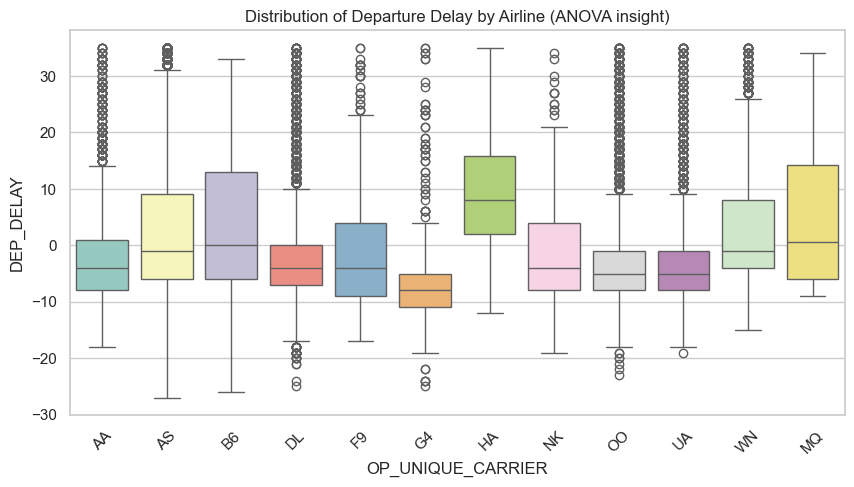

In [11]:
sns.boxplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=df, palette="Set3")
plt.title("Distribution of Departure Delay by Airline (ANOVA insight)")
plt.xticks(rotation=45)
plt.show()


In [12]:
# Danh sách các cột không được đưa vào F-test
remove_features = [
    'DEP_DELAY',
    'DEP_DELAY_NEW', 
    'DEP_DELAY_GROUP',
    'DEP_DEL15',
    'DISTANCE_GROUP'
]

# Lọc X, chỉ giữ numeric hợp lệ và không nằm trong danh sách loại bỏ
X = df.select_dtypes(include=[np.number]).drop(
    columns=[col for col in remove_features if col in df.columns],
    errors='ignore'
)

y = df['DEP_DELAY']

# Scale dữ liệu để chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# F-test
f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(X_scaled, y)

# Tạo bảng kết quả
f_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_selector.scores_,
    'p_value': f_selector.pvalues_
}).sort_values(by='F_Score', ascending=False)

# Top 10 features
f_scores.head(10)


,Feature,F_Score,p_value
3,CRS_DEP_TIME,1233.236282,1.444940e-266
0,MONTH,543.146824,1.982332e-119
6,DISTANCE,452.373201,6.801737e-100
5,CRS_ELAPSED_TIME,414.449106,1.019021e-91
7,HourlyDewPointTemperature,367.126578,1.667003e-81
8,HourlyDryBulbTemperature,317.993754,6.941378e-71
4,CRS_ARR_TIME,175.705951,4.988055e-40
11,HourlyWindSpeed,75.158081,4.486537e-18
1,DAY_OF_MONTH,17.808094,2.448182e-05
9,HourlyRelativeHumidity,17.741460,2.535410e-05


C:\Users\PC\AppData\Local\Temp\ipykernel_34240\560282998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_Score', y='Feature', data=f_scores.head(10), palette='crest')


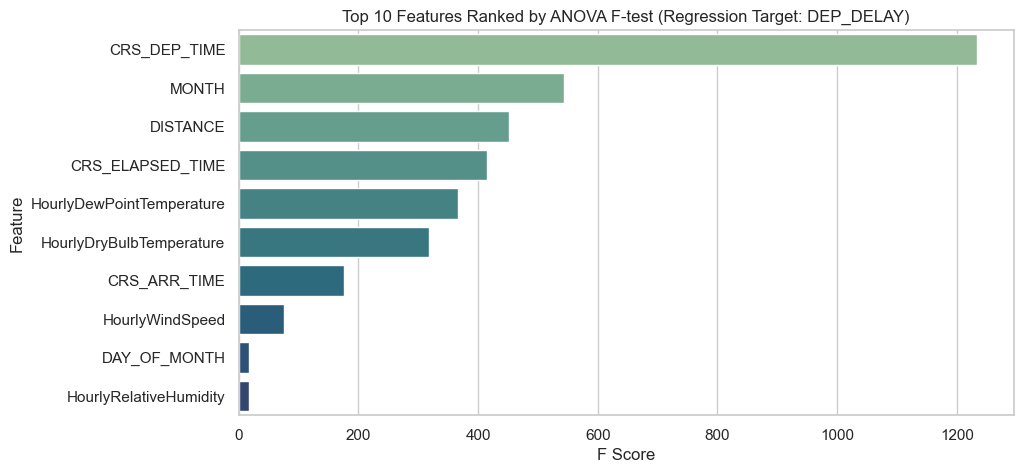

In [13]:
sns.barplot(x='F_Score', y='Feature', data=f_scores.head(10), palette='crest')
plt.title('Top 10 Features Ranked by ANOVA F-test (Regression Target: DEP_DELAY)')
plt.xlabel('F Score')
plt.ylabel('Feature')
plt.show()
